Requirements

In [ ]:
from PhysicsOneA import *
from PhysicsOneA.dependencies import *

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


# Code Examples

Vector Example

In [2]:
v = Vector([1, 1])
v

In [3]:
print(v)

Vector: [1 1]
Length: 1.4142135623730951


In [4]:
#u = ufloat(2,0.1)
#solve_suvat(u=u, v=u+u, t=u+u+u)

In [5]:
speed_converter(10)

In [6]:
a = VectorPair(v,[2,3])
a.displacement()

array([1, 2])

In [7]:
a.getVector(1)

array([2, 3])

In [8]:
print(a)

Vector Pair:
  First: [1 1]
  Second: [2 3]


--- Projectile Info ---
Initial speed (v0): 22.4334+/-0 m/s
Launch angle (theta): 50.00+/-0°
Horizontal velocity (v0x): 14.4199+/-0 m/s
Vertical velocity (v0y): 17.1850+/-0 m/s
Initial height (y0): 0.0000+/-0 m
Gravity (g): 9.8200+/-0 m/s²

--- Derived Quantities ---
Time of flight (flat): 3.5000+/-0 s
Time of flight (realistic): 3.5000+/-0 s
Maximum height: 15.0369+/-0 m
Range: 50.4697+/-0 m


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
C:\Users\victo\Documents\DTU Kurser\Fysik 1\PhysicsOneA\src\PhysicsOneA\Kinematics2D.py:238: FutureWarning: AffineScalarFunc.__gt__() is deprecated. It will be removed in a future release.
  return max(t1, t2)


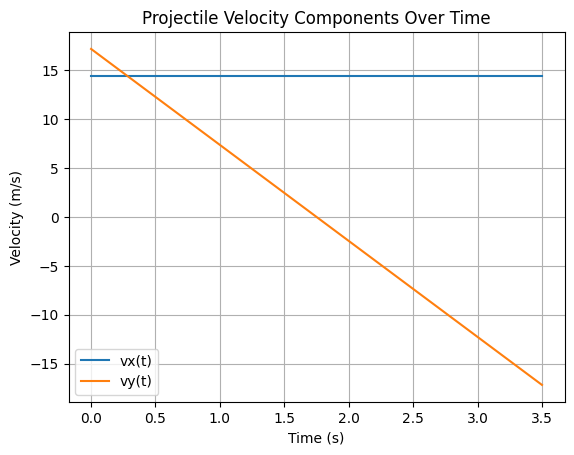

In [9]:
proj = Projectile(time_of_flight=3.5, theta=degree_to_radian(50))
print(proj)

proj.plot_velocity_over_time()

In [10]:
j = Projectile(max_height=ufloat(0.3,0.05),range_=ufloat(10,0.1))
print(j)

--- Projectile Info ---
Initial speed (v0): 20.3812+/-1.6984 m/s
Launch angle (theta): 6.84+/-0°
Horizontal velocity (v0x): 20.2361+/-1.6863 m/s
Vertical velocity (v0y): 2.4273+/-0.2023 m/s
Initial height (y0): 0.0000+/-0 m
Gravity (g): 9.8200+/-0 m/s²

--- Derived Quantities ---
Time of flight (flat): 0.4944+/-0.0412 s
Time of flight (realistic): 0.4944+/-0.0412 s
Maximum height: 0.3000+/-0.0500 m
Range: 10.0041+/-1.6673 m


C:\Users\victo\Documents\DTU Kurser\Fysik 1\PhysicsOneA\src\PhysicsOneA\Kinematics2D.py:139: FutureWarning: AffineScalarFunc.__abs__() is deprecated. It will be removed in a future release.
  err = abs(lhs - rhs)
C:\Users\victo\Documents\DTU Kurser\Fysik 1\PhysicsOneA\src\PhysicsOneA\Kinematics2D.py:140: FutureWarning: AffineScalarFunc.__lt__() is deprecated. It will be removed in a future release.
  if err < min_error:


In [12]:
c = CircularMotion(r=ufloat(6370e3, 0), T=ufloat(86400, 0))
print(c)

--- Circular Motion ---
Radius r: 6370000.00000 ± 0.00000 m
Period T: 86400.00000 ± 0.00000 s
463.23947 ± 0.00000 m/s
0.03369 ± 0.00000 m/s²
tangential acceleration = N/A
Critical period for weightlessness: 5060.50 ± 0.00 seconds (~1.41 ± 0.00 hours)
